In [7]:
import os

import numpy as np
import pandas as pd

### Models
#import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
###

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper

from sklearn.pipeline import Pipeline
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline 
from sklearn2pmml.decoration import ContinuousDomain

from feature_selector import FeatureSelector

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnxruntime as rt 
from onnx.tools.net_drawer import GetPydotGraph,GetOpNodeProducer 
from onnxmltools.convert.common.shape_calculator import calculate_linear_classifier_output_shapes

In [9]:
df=pd.read_csv('data_public.csv.gz',compression='gzip',quotechar='"',na_values='?')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [11]:
columns = list(df.columns[:15])
X = df[columns]
y = pd.DataFrame(data=df['Class'],columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn import tree

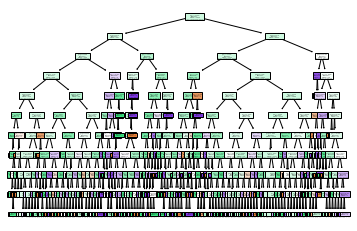

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
_ = tree.plot_tree(clf, filled=True)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(960000, 15) (960000, 1)
(240000, 15) (240000, 1)


In [6]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
49523,-39.070967,-13.993485,12.755433,22.099220,-26.098083,-28.904296,-6.931708,-20.258181,-12.913774,21.048099,3.665785,4.311424,-53.013483,-10.738060,2.712527,3
995929,-61.808327,-41.957401,-41.490666,-112.434706,-14.208461,-120.971986,-50.933840,0.744631,51.713175,-89.678835,29.226463,-34.406620,-56.168399,31.846020,56.506673,1
985491,-60.429288,-54.283408,-45.264694,-111.152553,-13.610853,-127.830352,-52.982249,-11.691910,53.699488,-91.917603,44.484761,-35.990494,-73.056929,33.044995,61.869758,2
308798,234.448292,-3.450128,218.546747,-11.961289,136.651701,98.388163,124.640728,203.887003,73.530897,111.603446,204.007638,-3.770394,-7.356190,128.221413,145.519543,3
712941,-28.671650,-14.372538,11.575421,17.052604,-22.763807,-37.737249,-2.421059,-25.857008,-4.190950,18.478348,0.703697,1.046246,-56.061187,-5.227219,0.681074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452634,-54.876579,-45.977811,-42.044670,-105.090223,-13.162972,-119.238198,-51.853975,-14.629073,48.202459,-85.942195,41.234793,-37.195456,-48.360588,27.521220,63.009200,2
177767,235.751825,-7.820781,203.991547,-15.400080,129.152379,67.437326,121.904788,191.967780,91.545335,125.900450,223.138527,-2.978220,-20.517356,139.461233,159.730953,1
57146,-30.584108,-22.697936,10.003380,17.471858,-23.064206,-23.438194,-5.032581,-27.734819,-9.285967,26.509407,2.889996,5.965657,-51.455216,-2.731989,3.082593,2
838526,230.808320,-4.789669,204.813325,-11.117900,134.610737,84.022431,105.907989,195.131808,82.513623,130.001230,207.361121,-4.832192,-12.989910,156.935487,147.752982,3


In [7]:
testing_data = pd.concat([X_test, y_test], axis=1)
testing_data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
582584,-27.143874,-18.460955,19.079335,19.043292,-26.146278,-29.137655,-3.484755,-33.198778,-11.471104,27.838568,0.599197,3.047610,-54.478460,-8.609687,2.899122,2
555578,-61.844089,-46.431128,-39.492057,-104.884554,-15.878880,-129.284201,-54.307486,-10.737881,56.824921,-91.518982,41.188767,-40.319027,-46.450171,23.958510,65.227927,2
881051,-34.154695,-17.201828,8.580868,15.962621,-24.554103,-38.860756,-0.694473,-24.491830,-4.467947,34.154342,-1.278909,-1.079240,-55.461668,-1.737872,-4.416824,1
890282,241.074707,-13.187917,215.886650,-13.001444,124.752837,82.468222,122.500652,186.009804,64.149609,130.822286,209.235441,3.208014,-20.757096,141.975096,148.450038,3
397318,-37.170966,-18.723285,7.689989,22.875067,-19.685492,-21.684064,5.982991,-27.278722,-3.754375,24.362457,0.037855,2.678353,-51.644837,-10.255368,2.707063,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046815,-55.508972,-47.725624,-37.727688,-113.907570,-15.651904,-121.811888,-53.736981,-4.988491,52.559974,-92.225099,41.435186,-42.562636,-57.100509,32.997017,55.174275,1
456880,229.100297,-8.057099,229.974552,-12.353095,130.733631,83.657371,119.061328,207.947890,80.839870,133.507031,198.779346,-7.593767,-19.026099,144.736897,154.077159,2
766674,-28.629271,-13.813746,14.349807,19.654632,-28.449789,-28.094025,-4.334237,-26.414321,-7.374118,29.585087,6.082622,6.992260,-55.570608,-6.677092,1.042529,2
817240,-31.915493,-13.585699,7.127198,14.489737,-18.552508,-34.924419,3.561485,-27.253164,-4.798538,27.418837,4.908467,3.559463,-53.222173,-7.207706,4.743913,2


In [8]:
temp_df = df[columns]
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(temp_df))
df_scaled = pd.concat([df_scaled,df['Class']],axis=1)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,1.398333,0.457892,1.386800,-0.043941,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,0.048383,1.542774,1.390885,1.402222,2
1,-0.686316,0.320671,-0.589262,0.764323,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.613532,-0.949550,-0.909245,-0.875843,3
2,-0.695429,-0.109594,-0.480605,0.710940,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.830704,-0.815240,-0.805046,-0.910959,2
3,1.322591,0.902156,1.378256,0.077838,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.200674,1.499253,1.274864,1.338920,2
4,1.376193,0.441525,1.263438,0.005832,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.332113,1.518267,1.469607,1.313165,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.583934,0.574725,-0.534696,0.657050,-0.781209,-0.347150,-0.519643,-0.691211,-0.987396,-0.157322,-0.816495,0.547687,-0.468207,-0.860710,-0.934167,2
1199996,-0.698200,0.267472,-0.504915,0.675492,-0.770037,-0.251527,-0.475704,-0.708306,-0.986908,-0.136848,-0.922171,0.491340,-0.720338,-0.747363,-0.902058,3
1199997,1.340711,0.101371,1.350786,0.034566,1.344392,1.294568,1.296033,1.439018,1.130041,1.404063,1.299614,0.304915,1.537185,1.487511,1.265098,1
1199998,-0.842045,-1.602949,-1.084858,-2.319727,-0.550122,-1.547680,-1.334400,-0.589197,0.521012,-1.679556,-0.469105,-1.858541,-0.946075,-0.232754,-0.073445,2


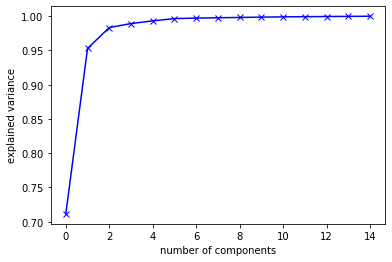

[7.11447169e-01 2.41423046e-01 3.05472040e-02 5.76603629e-03
 3.95249929e-03 3.35997122e-03 6.37710310e-04 5.44675407e-04
 4.57257234e-04 4.47617738e-04 3.71201367e-04 3.01512481e-04
 2.48754417e-04 1.94997777e-04 1.79105275e-04]

 [71.14471689 95.28702154 98.34174195 98.91834558 99.3135955  99.64959263
 99.71336366 99.7678312  99.81355692 99.8583187  99.89543883 99.92559008
 99.95046552 99.9699653  99.98787583]


In [9]:
# Apply PCA on all the components
pca_all_comp = decomposition.PCA(n_components=15)
pca_all_comp.fit(df_scaled)

plt.plot(np.cumsum(pca_all_comp.explained_variance_ratio_),'bx-')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()
print(pca_all_comp.explained_variance_ratio_)
print('\n',np.cumsum(pca_all_comp.explained_variance_ratio_*100))

In [10]:
pca = decomposition.PCA(n_components=0.95)
pca.fit(df_scaled)

print("The optimal number of components to maintain 95% variance : {}".format(pca.n_components_))

The optimal number of components to maintain 95% variance : 2


In [11]:
pipeline = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train.columns.values,StandardScaler())])),
    ('pca',
     PCA(n_components=15)),
    ('selector',
     SelectKBest(k=5)),
    ('classifier',DecisionTreeClassifier(max_depth = 3)
     )
])

pipeline.fit(X_train,y_train.values.ravel());
print(metrics.accuracy_score(y_test.values.ravel(),pipeline.predict(X_test)))

0.4993


In [12]:
transformer = Pipeline(steps=[
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('feature',
     transformer,
     df.columns[0:15])
])

classifier = DecisionTreeClassifier(max_depth = 3)

In [13]:
pipeline = Pipeline([
    ('precprocessor',
     preprocessor),
    ('pca',
     PCA(n_components=15)),
    ('selector',
     SelectKBest(k=5)),
    ('classifier',
     classifier)
])

pipeline.fit(training_data.iloc[:,:15],
             training_data['Class']);

In [14]:
print(metrics.accuracy_score(y_test.values.ravel(),pipeline.predict(X_test)))

0.4993


In [15]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("./pipeline/pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [16]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("./pipeline/pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 2 2 ... 2 2 2]


In [17]:
np.unique(np.array(predict_onnx[0]), return_counts=True)

(array([1, 2, 3], dtype=int64), array([     1, 239987,     12]))

In [18]:
np.unique(predict_onnx[0] == testing_data.iloc[:,15], return_counts=True)

(array([False,  True]), array([120168, 119832]))